## Importación de datos



In [ ]:
# import pandas as pd


#url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
#url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
#url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
#url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

#tienda = pd.read_csv(url)
#tienda2 = pd.read_csv(url2)
#tienda3 = pd.read_csv(url3)
#tienda4 = pd.read_csv(url4)

#tienda.head()

In [ ]:
#para permitir datos de drive:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [84]:
#Bibliotecas
!pip install tabulate
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np #estadística
import matplotlib.font_manager as fm
import math
import matplotlib.colors as mcolors


# Ruta a la fuente
ruta_fuente = "/content/drive/MyDrive/Curso_Oracle/Challenge_1_DataScience/ShareTech-Regular.ttf"

# Registrar la fuente en matplotlib
fm.fontManager.addfont(ruta_fuente)
plt.rcParams['font.family'] = 'Share Tech'

In [ ]:
#OTRA OPCIÓN / FORMA DE CARGAR DATOS DESDE DRIVE (:


#Base principal de un csv:
#Esta función carga un archivo CSV y lo convierte directamente en un DataFrame de pandas
tienda1 = pd.read_csv('/content/drive/MyDrive/Curso_Oracle/Challenge_1_DataScience/tienda_1 .csv')
tienda2 = pd.read_csv('/content/drive/MyDrive/Curso_Oracle/Challenge_1_DataScience/tienda_2.csv')
tienda3 = pd.read_csv('/content/drive/MyDrive/Curso_Oracle/Challenge_1_DataScience/tienda_3.csv')
tienda4 = pd.read_csv('/content/drive/MyDrive/Curso_Oracle/Challenge_1_DataScience/tienda_4.csv')

# Visualizar las primeras filas
tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### Descripción de los datos:

El conjunto de datos incluye la siguiente información:

**Producto y Categoría**: Artículos vendidos y sus calificaciones.

**Precio y Envío:** Valores de venta y costos asociados.

**Fecha y ubicación de compra:** Información temporal y geográfica.

**Evaluación de compra:** Comentarios de clientes.

**Tipo de Pago y Cuotas:** Métodos utilizados por los clientes.

**Coordenadas Geográficas** Ubicación de las transacciones.

### Exploración de los datos:

In [ ]:
# Información relevante de los datos creando una función y aplicando interpolación de strings la usaremos para revisar los datos de cada tienda
"""
    Nos brinda información general del Data Frame, como:
    Cantidad de filas y columnas
    Cantidad de datos nulos por columna
    Cantidad de datos únicos por columna
    Tipos de datos por columna
    Cantidad de duplicados

    Parámetros:
    df: DataFrame a analizar

    Retorno:
    Imprime las estadísticas redondeadas por tienda.
"""
def info_general(df):
    print('Información general del DataFrame:')
    print(f'Cantidad de filas y columnas: {df.shape}')
    print("-" * 50)
    print('Cantidad de datos nulos por columna:')
    display(df.isnull().sum().to_frame(name='Nulos'))
    print("-" * 50)
    print('Cantidad de datos únicos por columna:')
    display(df.nunique().to_frame(name='Únicos'))
    print("-" * 50)
    print('Tipos de datos por columna:')
    display(df.dtypes.to_frame(name='Tipos de datos'))
    print("-" * 50)
    print(f'Cantidad de duplicados: {df.duplicated().sum()}')
    print("Siguiente DF")



In [ ]:
# Llamamos a la función con cada uno de nuestros DataFrame
info_general(tienda1)
info_general(tienda2)
info_general(tienda3)
info_general(tienda4)

Información general del DataFrame:
Cantidad de filas y columnas: (2359, 12)
--------------------------------------------------
Cantidad de datos nulos por columna:


,Nulos
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


--------------------------------------------------
Cantidad de datos únicos por columna:


,Únicos
Producto,51
Categoría del Producto,8
Precio,1937
Costo de envío,753
Fecha de Compra,1018
Vendedor,14
Lugar de Compra,19
Calificación,5
Método de pago,4
Cantidad de cuotas,15


--------------------------------------------------
Tipos de datos por columna:


,Tipos de datos
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,object
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64


--------------------------------------------------
Cantidad de duplicados: 0
Siguiente DF
Información general del DataFrame:
Cantidad de filas y columnas: (2359, 12)
--------------------------------------------------
Cantidad de datos nulos por columna:


,Nulos
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


--------------------------------------------------
Cantidad de datos únicos por columna:


,Únicos
Producto,51
Categoría del Producto,8
Precio,1908
Costo de envío,736
Fecha de Compra,1025
Vendedor,14
Lugar de Compra,19
Calificación,5
Método de pago,4
Cantidad de cuotas,17


--------------------------------------------------
Tipos de datos por columna:


,Tipos de datos
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,object
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64


--------------------------------------------------
Cantidad de duplicados: 0
Siguiente DF
Información general del DataFrame:
Cantidad de filas y columnas: (2359, 12)
--------------------------------------------------
Cantidad de datos nulos por columna:


,Nulos
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


--------------------------------------------------
Cantidad de datos únicos por columna:


,Únicos
Producto,51
Categoría del Producto,8
Precio,1946
Costo de envío,737
Fecha de Compra,1024
Vendedor,14
Lugar de Compra,19
Calificación,5
Método de pago,4
Cantidad de cuotas,17


--------------------------------------------------
Tipos de datos por columna:


,Tipos de datos
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,object
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64


--------------------------------------------------
Cantidad de duplicados: 0
Siguiente DF
Información general del DataFrame:
Cantidad de filas y columnas: (2358, 12)
--------------------------------------------------
Cantidad de datos nulos por columna:


,Nulos
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


--------------------------------------------------
Cantidad de datos únicos por columna:


,Únicos
Producto,51
Categoría del Producto,8
Precio,1867
Costo de envío,692
Fecha de Compra,1030
Vendedor,14
Lugar de Compra,19
Calificación,5
Método de pago,4
Cantidad de cuotas,13


--------------------------------------------------
Tipos de datos por columna:


,Tipos de datos
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,object
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64


--------------------------------------------------
Cantidad de duplicados: 0
Siguiente DF


#1. Análisis de facturación



In [ ]:
#Diccionario de tiendas que usaremos para optimizar código en las funciones que utilicemos
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4,
}

# Calcular ingresos brutos a partir de la columna precio
ventas_brutas = {}

for tienda, df in tiendas.items():
    ventas_brutas[tienda] = df["Precio"].sum()

# Imprimir resultado
print("💰 Ventas brutas totales por tienda:")
for tienda, total in ventas_brutas.items():
    print("------" * 5)
    print(f"{tienda}: {total:,.2f}")

💰 Ventas brutas totales por tienda:
------------------------------
Tienda 1: 1,150,880,400.00
------------------------------
Tienda 2: 1,116,343,500.00
------------------------------
Tienda 3: 1,098,019,600.00
------------------------------
Tienda 4: 1,038,375,700.00


In [ ]:
#Suponiendo que para cada venta de producto la tienda pague el costo de envio, haremos una columna de venta neta, que tome el precio - costo de envío:

# Diccionarios para guardar totales de ventas netas
ventas_netas = {}

# Cálculo en bucle
for nombre, df in tiendas.items():
    df["Venta Neta"] = df["Precio"] - df["Costo de envío"]
    ventas_brutas[nombre] = df["Precio"].sum()
    ventas_netas[nombre] = df["Venta Neta"].sum()

# Mostrar resultados
print("Ingresos y Ventas Netas por Tienda:\n")
for tienda in tiendas.keys():
    print(f"{tienda}:")
    print(f"  Total Ingreso: {ventas_brutas[tienda]:,}")
    print(f"  Venta Neta:    {ventas_netas[tienda]:,}")
    print("----" * 20)


Ingresos y Ventas Netas por Tienda:

Tienda 1:
  Total Ingreso: 1,150,880,400.0
  Venta Neta:    1,089,502,500.0
--------------------------------------------------------------------------------
Tienda 2:
  Total Ingreso: 1,116,343,500.0
  Venta Neta:    1,056,858,400.0
--------------------------------------------------------------------------------
Tienda 3:
  Total Ingreso: 1,098,019,600.0
  Venta Neta:    1,039,503,000.0
--------------------------------------------------------------------------------
Tienda 4:
  Total Ingreso: 1,038,375,700.0
  Venta Neta:    983,058,300.0
--------------------------------------------------------------------------------


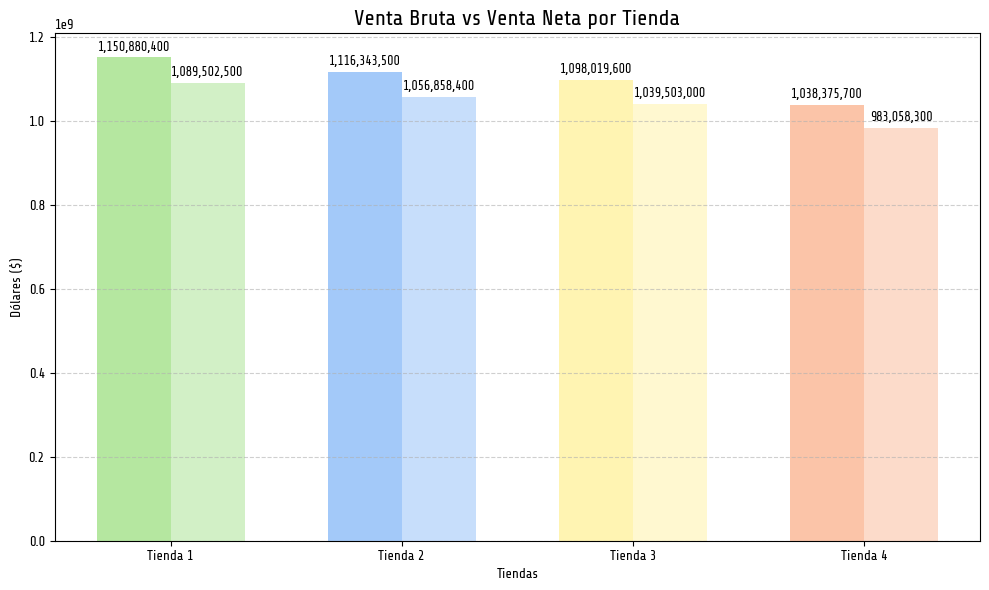

In [102]:
# Colores pastel por tienda
colores = {
    "Tienda 1": "#b5e7a0",  # Verde pastel
    "Tienda 2": "#a3c9f9",  # Azul claro
    "Tienda 3": "#fff4b2",  # Amarillo pastel
    "Tienda 4": "#fbc4a8",  # Naranja pastel
}

# Función para aclarar color
def aclarar(color, factor=0.8):
    return mcolors.to_rgba(color, alpha=factor)

# Datos
nombres = list(tiendas.keys())
valores_bruto = list(ventas_brutas.values())
valores_netos = list(ventas_netas.values())
x = np.arange(len(nombres))
ancho = 0.32

# Colores para cada tienda
color_tienda = [colores.get(nombre, "#cccccc") for nombre in nombres]
color_tienda_aclarado = [aclarar(c, 0.6) for c in color_tienda]

# Crear gráfico
plt.figure(figsize=(10, 6))

# Barras brutas y netas
barras1 = plt.bar(x - ancho/2, valores_bruto, width=ancho, label='Venta Bruta ($)', color=color_tienda)
barras2 = plt.bar(x + ancho/2, valores_netos, width=ancho, label='Venta Neta ($)', color=color_tienda_aclarado)

# Etiquetas y título
plt.title("Venta Bruta vs Venta Neta por Tienda", fontsize=16, fontweight='bold')
plt.xlabel("Tiendas")
plt.ylabel("Dólares ($)")
plt.xticks(x, nombres)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar valores encima de las barras
for barras in [barras1, barras2]:
    for barra in barras:
        height = barra.get_height()
        plt.text(
            barra.get_x() + barra.get_width() / 2,
            height + max(valores_bruto + valores_netos) * 0.01,
            f"{height:,.0f}",
            ha='center',
            va='bottom',
            fontsize=9.5
        )
plt.savefig("VentasBrutasyNetas.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()




In [ ]:
def mostrar_maxmin(diccionario, tipo_venta):
    """
    Muestra la tienda/df con mayor y menor valor en un diccionario.

    Parámetros:
    diccionario: dict con valores numéricos por tienda.
    tipo_venta: str para indicar si es venta bruta o venta neta.
    """
    mayor = max(diccionario, key=diccionario.get)
    menor = min(diccionario, key=diccionario.get)

    print(f"Tienda con MAYOR {tipo_venta}: {mayor}  {diccionario[mayor]:,}")
    print(f"Tienda con MENOR {tipo_venta}: {menor}  {diccionario[menor]:,}")
    print("----" * 20)

# Llamamos la función para ingresos y ventas netas
print("Comparativa entre tiendas\n")
mostrar_maxmin(ventas_brutas, "ingreso bruto")
mostrar_maxmin(ventas_netas, "venta neta")

Comparativa entre tiendas

Tienda con MAYOR ingreso bruto: Tienda 1  1,150,880,400.0
Tienda con MENOR ingreso bruto: Tienda 4  1,038,375,700.0
--------------------------------------------------------------------------------
Tienda con MAYOR venta neta: Tienda 1  1,089,502,500.0
Tienda con MENOR venta neta: Tienda 4  983,058,300.0
--------------------------------------------------------------------------------


# 2. Ventas por categoría

In [ ]:
print("CATEGORÍAS MÁS POPULARES POR TIENDA\n")

for nombre_tienda, df in tiendas.items():
    print(f" {nombre_tienda}")
    categorias = df["Categoría del Producto"].value_counts()

    for categoria, cantidad in categorias.items():
        print(f"  - {categoria}: {cantidad} ventas")

    print("-" * 50)


CATEGORÍAS MÁS POPULARES POR TIENDA

 Tienda 1
  - Muebles: 465 ventas
  - Electrónicos: 448 ventas
  - Juguetes: 324 ventas
  - Electrodomésticos: 312 ventas
  - Deportes y diversión: 284 ventas
  - Instrumentos musicales: 182 ventas
  - Libros: 173 ventas
  - Artículos para el hogar: 171 ventas
--------------------------------------------------
 Tienda 2
  - Muebles: 442 ventas
  - Electrónicos: 422 ventas
  - Juguetes: 313 ventas
  - Electrodomésticos: 305 ventas
  - Deportes y diversión: 275 ventas
  - Instrumentos musicales: 224 ventas
  - Libros: 197 ventas
  - Artículos para el hogar: 181 ventas
--------------------------------------------------
 Tienda 3
  - Muebles: 499 ventas
  - Electrónicos: 451 ventas
  - Juguetes: 315 ventas
  - Electrodomésticos: 278 ventas
  - Deportes y diversión: 277 ventas
  - Libros: 185 ventas
  - Instrumentos musicales: 177 ventas
  - Artículos para el hogar: 177 ventas
--------------------------------------------------
 Tienda 4
  - Muebles: 480 

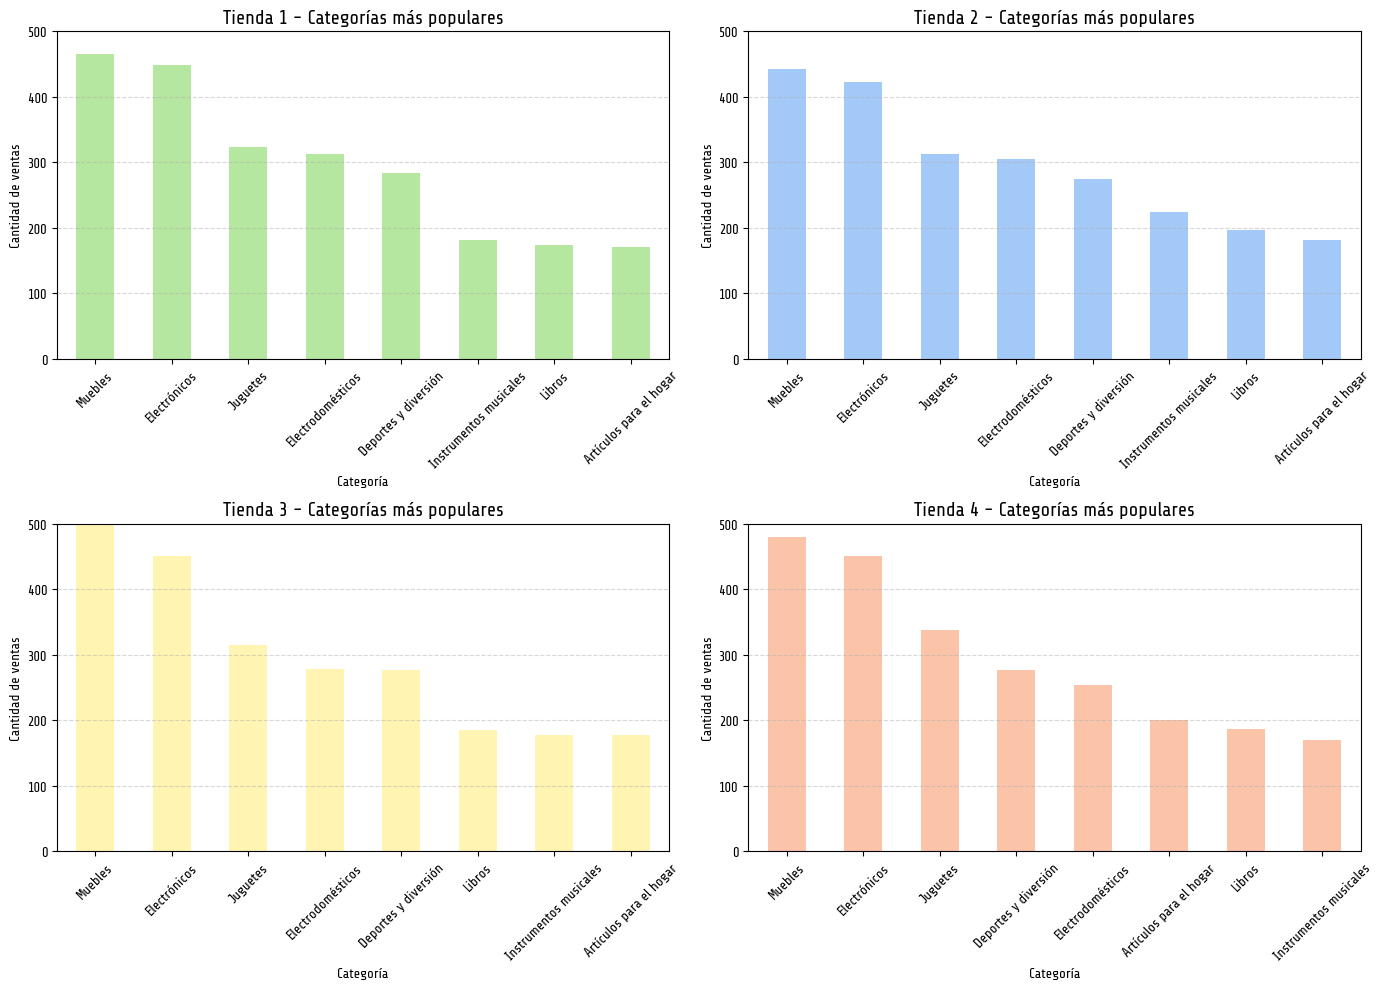

In [106]:
# Colores pastel por tienda
colores = {
    "Tienda 1": "#b5e7a0",  # Verde pastel
    "Tienda 2": "#a3c9f9",  # Azul claro
    "Tienda 3": "#fff4b2",  # Amarillo pastel
    "Tienda 4": "#fbc4a8",  # Naranja pastel
}

# Obtener el máximo global de ventas por categoría
max_y = 0
for df in tiendas.values():
    max_categoria = df["Categoría del Producto"].value_counts().max()
    if max_categoria > max_y:
        max_y = max_categoria

#Redondear hacia arriba a la decena más cercana *esto lo hacemos para dar una escala visual más real, asi todos los ejes "Y" tendran un valor igual"
max_y = math.ceil(max_y / 10) * 10

# Crear subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Crear gráficos con límite uniforme en Y
for i, (nombre_tienda, df) in enumerate(tiendas.items()):
    categorias = df["Categoría del Producto"].value_counts()
    color = colores.get(nombre_tienda, "#cccccc")

    categorias.plot(kind='bar', ax=axes[i], color=color)

    axes[i].set_title(f"{nombre_tienda} - Categorías más populares", fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Categoría")
    axes[i].set_ylabel("Cantidad de ventas")
    axes[i].set_ylim(0, max_y)  # Escala unificada en Y
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos si hay menos de 4 tiendas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.savefig("Categorias", dpi=300, bbox_inches='tight')
plt.show()





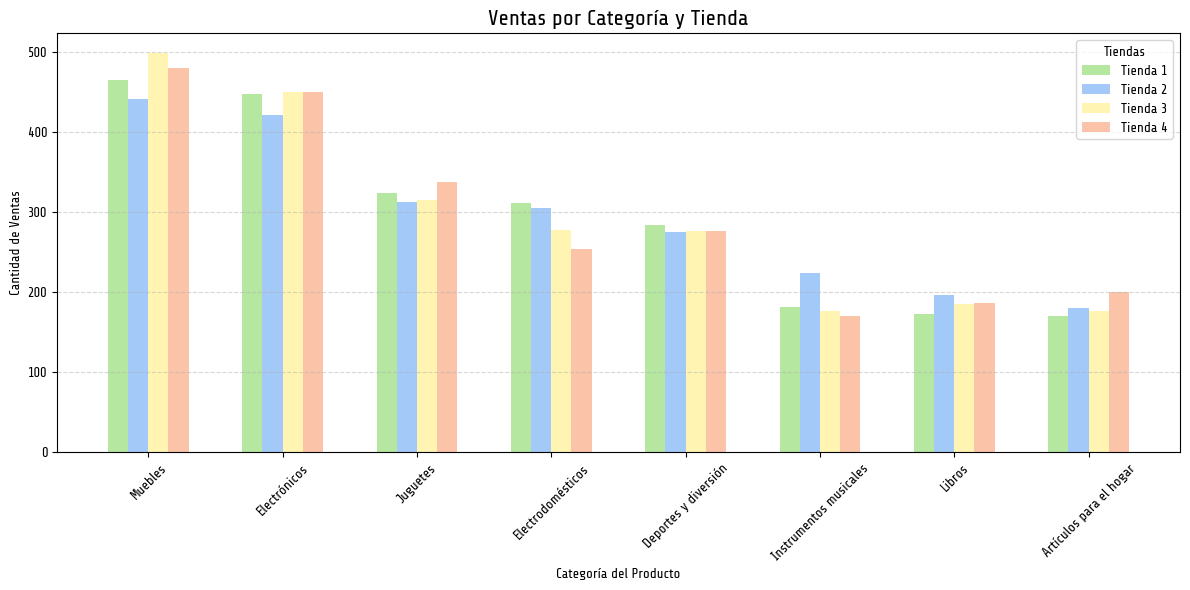

In [101]:
# Combinar conteos en un DataFrame
categoria_data = pd.DataFrame()

for tienda, df in tiendas.items():
    conteo = df["Categoría del Producto"].value_counts()
    categoria_data[tienda] = conteo

categoria_data = categoria_data.fillna(0)

# Gráfico de barras agrupadas
x = np.arange(len(categoria_data.index))
ancho = 0.15

plt.figure(figsize=(12, 6))
for i, tienda in enumerate(categoria_data.columns):
    color = colores.get(tienda, "#cccccc")  # Color de la tienda o gris por defecto
    plt.bar(x + i * ancho, categoria_data[tienda], width=ancho, label=tienda, color=color)

plt.xticks(x + ancho * (len(categoria_data.columns) - 1) / 2, categoria_data.index, rotation=45)
plt.title("Ventas por Categoría y Tienda", fontsize=16, fontweight='bold')
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad de Ventas")
plt.legend(title="Tiendas")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig("CategoriasyTiendas.png", dpi=300, bbox_inches='tight')

plt.show()




# 3. Calificación promedio de la tienda


In [ ]:
#para saber cual es el promedio de califiaciones de la tienda y la cantidad
for nombre, df in tiendas.items():
    promedio = df["Calificación"].mean()
    cantidad = df["Calificación"].count()
    print(f"Para la tienda {nombre}: su calificación promedio es de: {promedio:.2f} (sobre {cantidad} calificaciones)")



Para la tienda Tienda 1: su calificación promedio es de: 3.98 (sobre 2359 calificaciones)
Para la tienda Tienda 2: su calificación promedio es de: 4.04 (sobre 2359 calificaciones)
Para la tienda Tienda 3: su calificación promedio es de: 4.05 (sobre 2359 calificaciones)
Para la tienda Tienda 4: su calificación promedio es de: 4.00 (sobre 2358 calificaciones)


In [ ]:
#lo guardamos en un diccionario para poder utilizarlo para gráficar
promedios = {}
for nombre, df in tiendas.items():
    promedios[nombre] = df["Calificación"].mean()

print("Calificaciones promedio por tienda:")
for tienda, promedio in promedios.items():
    print(f"{tienda}: {promedio:.2f}")

Calificaciones promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


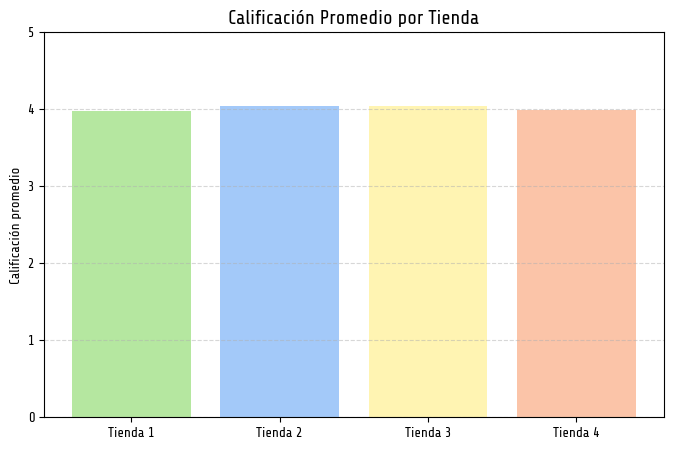

In [105]:
plt.figure(figsize=(8,5))
plt.bar(promedios.keys(), promedios.values(), color=['#b5e7a0', '#a3c9f9', '#fff4b2', '#fbc4a8'])
plt.title("Calificación Promedio por Tienda", fontweight='bold', fontsize=14)
plt.ylabel("Calificación promedio")
plt.ylim(0, 5)  # Asumiendo que la calificación es en escala 0-5
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig("CalificacionPromedio.png", dpi=300, bbox_inches='tight')
plt.show()


# 4. Productos más y menos vendidos

In [69]:
#mostraremos los top 3 productos más vendidos por tienda
for nombre, df in tiendas.items():
    productos = df["Producto"].value_counts()
    print(f" {nombre} - Top 3 productos más vendidos:\n{productos.head(3)}")
    print(f" {nombre} - Top 3 productos menos vendidos:\n{productos.tail(3)}")
    print("----" * 20)

 Tienda 1 - Top 3 productos más vendidos:
Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64
 Tienda 1 - Top 3 productos menos vendidos:
Producto
Olla de presión              35
Auriculares con micrófono    33
Celular ABXY                 33
Name: count, dtype: int64
--------------------------------------------------------------------------------
 Tienda 2 - Top 3 productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64
 Tienda 2 - Top 3 productos menos vendidos:
Producto
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64
--------------------------------------------------------------------------------
 Tienda 3 - Top 3 productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64
 Tienda 3 - Top 3 productos menos vendidos:
Producto
Mochila     

<ipython-input-104-3f8ba86388a2>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(datos.index, rotation=45, ha='right')
<ipython-input-104-3f8ba86388a2>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(datos.index, rotation=45, ha='right')
<ipython-input-104-3f8ba86388a2>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(datos.index, rotation=45, ha='right')
<ipython-input-104-3f8ba86388a2>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(datos.index, rotation=45, ha='right')


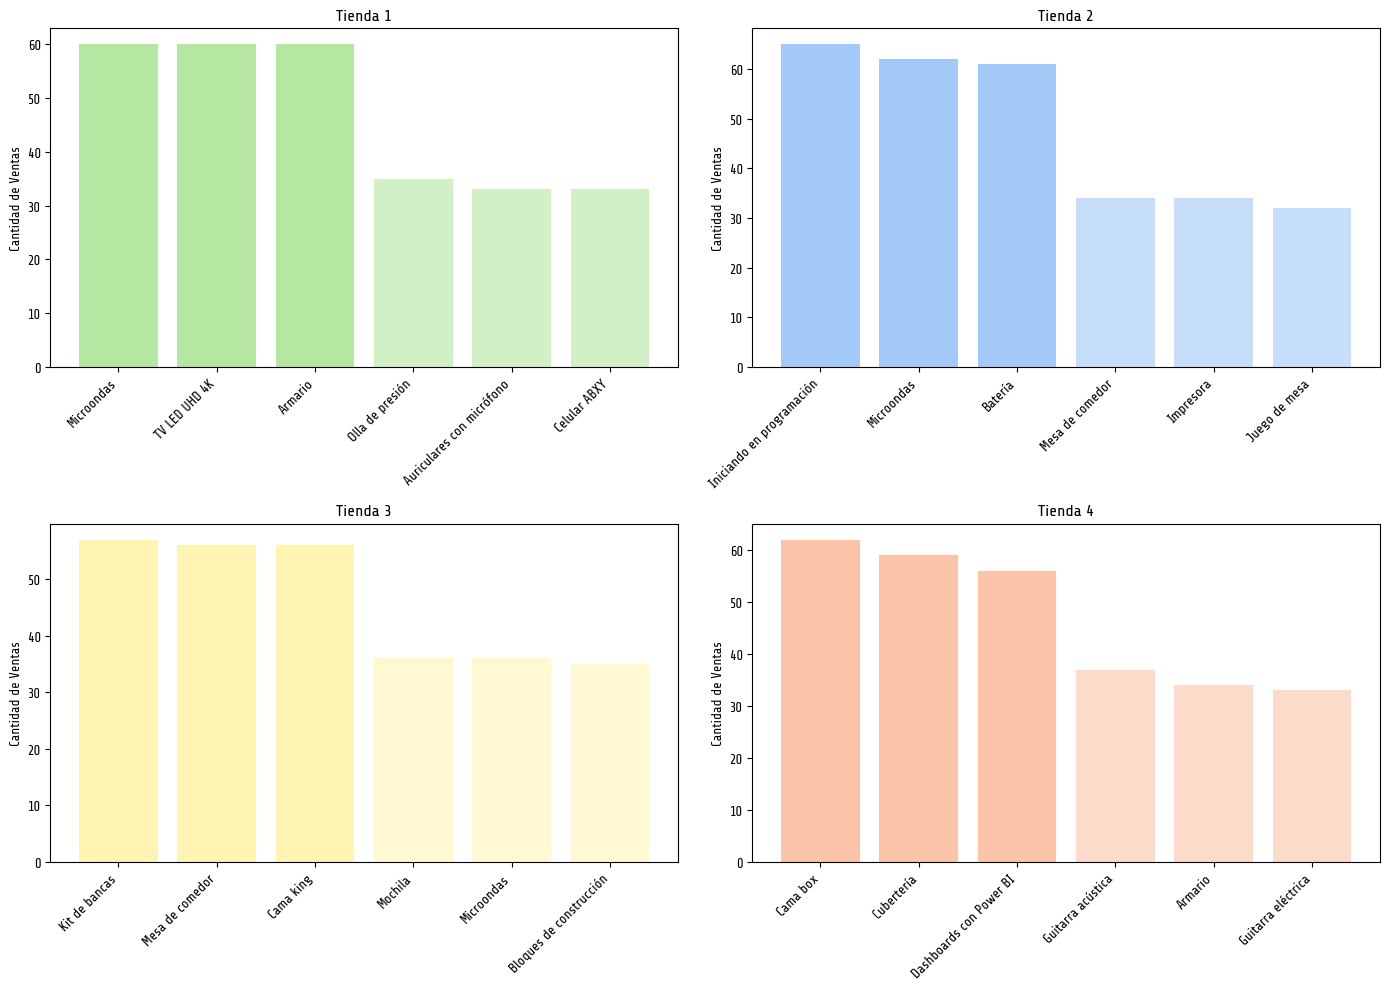

In [104]:
#grafico por tienda

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (nombre, df) in enumerate(tiendas.items()):
    productos = df["Producto"].value_counts()
    top3 = productos.head(3)
    bottom3 = productos.tail(3)
    datos = pd.concat([top3, bottom3])

    base_color = colores.get(nombre, "#ccc")
    colores_barra = [base_color] * 3 + [mcolors.to_rgba(base_color, alpha=0.6)] * 3

    axes[i].bar(datos.index, datos.values, color=colores_barra)
    axes[i].set_title(nombre, fontweight='bold')
    axes[i].set_ylabel("Cantidad de Ventas")
    axes[i].set_xticklabels(datos.index, rotation=45, ha='right')

plt.tight_layout()
plt.savefig("ProductosVendidos.png", dpi=300, bbox_inches='tight')

plt.show()





# 5. Envío promedio por tienda

In [75]:
#Costo de envio promedio por tienda
print("Costo de envío promedio por tienda:\n")

for nombre, df in tiendas.items():
    promedio_envio = df["Costo de envío"].mean()
    print(f"{nombre}: {promedio_envio:.2f}")

Costo de envío promedio por tienda:

Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46


<ipython-input-100-eee08bbe3bcc>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(datos_envio, labels=labels, patch_artist=True)


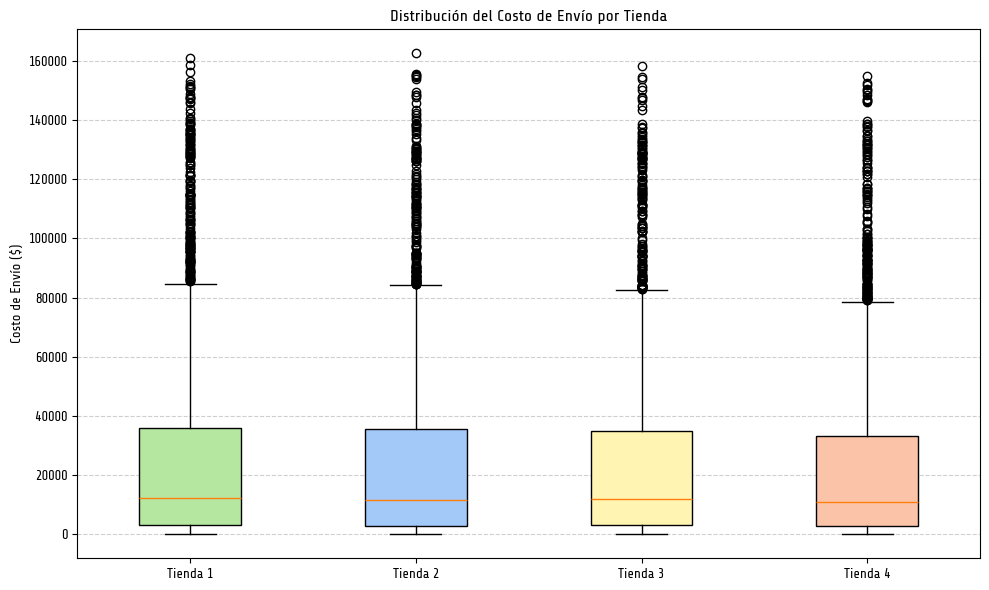

In [100]:
#graficaremos en un boxplot los promedio de envio por tienda
plt.figure(figsize=(10, 6))
datos_envio = [df["Costo de envío"] for df in tiendas.values()]
labels = list(tiendas.keys())

bp = plt.boxplot(datos_envio, labels=labels, patch_artist=True)

# Colorear cada box
for patch, label in zip(bp['boxes'], labels):
    patch.set_facecolor(colores.get(label, "#cccccc"))

plt.title("Distribución del Costo de Envío por Tienda", fontweight='bold')
plt.ylabel("Costo de Envío ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("BoxplotPromedios.png", dpi=300, bbox_inches='tight')

plt.show()




In [87]:
#Dado el gráfico anterior usaremos los cuantiles para identificar los valores atipicos y saber de que productos se tratan, así como su precio y costo de envío
#limitando a los 5 valores más atipicos por tienda

print("Valores atípicos por tienda:\n")

for nombre, df in tiendas.items():
    q1 = df["Costo de envío"].quantile(0.25)
    q3 = df["Costo de envío"].quantile(0.75)
    iqr = q3 - q1

    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    outliers = df[(df["Costo de envío"] < limite_inferior) | (df["Costo de envío"] > limite_superior)]

    print(f"{nombre}: {len(outliers)} valores atípicos:")

    if not outliers.empty:
        mostrar = outliers[["Producto", "Precio", "Costo de envío"]].head(5)
        print(tabulate(mostrar,
                       headers='keys',
                       tablefmt='pretty',
                       showindex=False,
                       floatfmt=".2f"))
    else:
        print("No se encontraron valores atípicos.")

    print("----" * 15)


Valores atípicos por tienda:

Tienda 1: 177 valores atípicos:
+---------------+-----------+----------------+
|   Producto    |  Precio   | Costo de envío |
+---------------+-----------+----------------+
| Refrigerador  | 2431300.0 |    127600.0    |
| TV LED UHD 4K | 1891700.0 |    107900.0    |
|   Iphone 15   | 2525400.0 |    135000.0    |
|   Iphone 15   | 2172400.0 |    113900.0    |
| TV LED UHD 4K | 2761500.0 |    147300.0    |
+---------------+-----------+----------------+
------------------------------------------------------------
Tienda 2: 166 valores atípicos:
+---------------+-----------+----------------+
|   Producto    |  Precio   | Costo de envío |
+---------------+-----------+----------------+
| TV LED UHD 4K | 2659900.0 |    141800.0    |
|   Smart TV    | 1653800.0 |    86200.0     |
| Refrigerador  | 1817600.0 |    97400.0     |
| Refrigerador  | 2464800.0 |    129400.0    |
| Refrigerador  | 1577500.0 |    84400.0     |
+---------------+-----------+----------------+

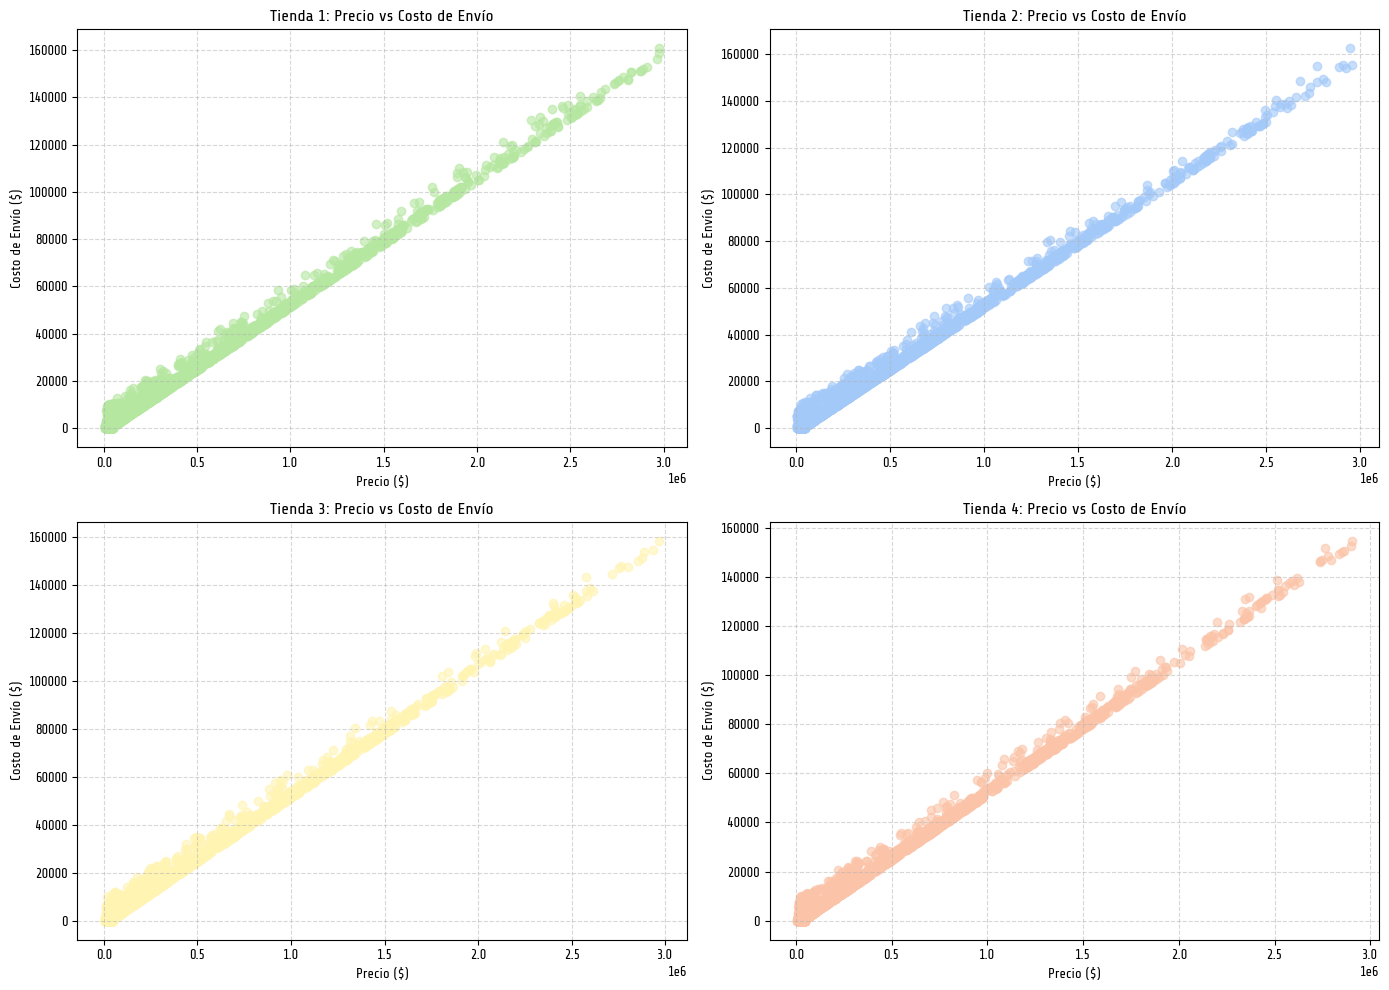

In [99]:
#ahora usando un scatter plot podremos ver la relación entre los precios y costos de envio de los articulos por tienda
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (nombre, df) in enumerate(tiendas.items()):
    ax = axes[i]
    ax.scatter(df["Precio"], df["Costo de envío"], alpha=0.6, color=colores.get(nombre, '#ccc'))
    ax.set_title(f"{nombre}: Precio vs Costo de Envío", fontweight='bold')
    ax.set_xlabel("Precio ($)")
    ax.set_ylabel("Costo de Envío ($)")
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("ScatterplotPrecioCosto.png", dpi=300, bbox_inches='tight')
plt.show()




# Informe Final


In [107]:
##Guardar imagenes:
""" import os

# Crear carpeta 'img' si no existe
os.makedirs("img", exist_ok=True)

# Mover imágenes a la carpeta
import shutil

imagenes = [
    "ScatterplotPrecioCosto.png",
    "BoxplotPromedios.png",
    "ProductosVendidos.png",
    "CalificacionProemdio.png",
    "CategoriasyTiendas.png",
    "Categorias.png",
    "VentasBrutasyNetas.png"
]

for img in imagenes:
    shutil.move(img, f"img/{img}") """

' import os\n\n# Crear carpeta \'img\' si no existe\nos.makedirs("img", exist_ok=True)\n\n# Mover imágenes a la carpeta\nimport shutil\n\nimagenes = [\n    "ScatterplotPrecioCosto.png",\n    "BoxplotPromedios.png",\n    "ProductosVendidos.png",\n    "CalificacionProemdio.png",\n    "CategoriasyTiendas.png",\n    "Categorias.png",\n    "VentasBrutasyNetas.png"\n]\n\nfor img in imagenes:\n    shutil.move(img, f"img/{img}") '

## 📊 Informe Final: Análisis de Tiendas para Selección de Ventas

###Sobre el análisis:

El Sr. Juan busca asociarse con la tienda más conveniente para vender sus productos. Para ello, se realizó un análisis completo de cuatro tiendas (Tienda 1, Tienda 2, Tienda 3 y Tienda 4) considerando factores como ingresos, categorías más vendidas, calificaciones de clientes, productos con mayor rotación y costos de envío. Este informe resume los hallazgos y ofrece una recomendación basada en datos y visualizaciones.

---

## Desarrollo:

### 🧾 Ingresos Totales

Se compararon las **ventas brutas y netas** por tienda.  
**Tienda 1** lidera en ambos indicadores, reflejando mayor volumen de negocio y eficiencia tanto en precio y costos de envío.
**Tienda 4** tiene los ingresos más bajos, lo cual puede indicar una baja demanda o que sus costos de envío afectan negativamente su venta.

### 📦 Categorías de Productos Más y Menos Vendidas

La **Tienda 1** y **Tienda 2** concentran sus ventas en pocas categorías, mostrando especialización.  
La **Tienda 4** tiene una distribución más dispersa, aunque con menor volumen general.

---

### ⭐ Calificaciones Promedio de Clientes

- **Tienda 3** es la mejor valorada (promedio > 4.5), lo cual indica alta satisfacción.
- **Tienda 4** tiene las calificaciones más bajas, lo que podría reflejar problemas en experiencia o calidad.

---

### 🏷️ Productos Más y Menos Vendidos

La **Tienda 1** depende mucho de un solo producto estrella.  
La **Tienda 3** muestra una venta más balanceada entre sus productos.

---

### 🚚 Costos de Envío

- **Tienda 2** y **Tienda 1** tienen costos de envío más estables y bajos.
- **Tienda 4** muestra mayor número de valores atípicos y costos elevados, lo cual puede afectar la experiencia del cliente.

---

## ✅ Conclusión y Recomendación

 **Recomendamos al Sr. Juan vender sus productos en la Tienda 1**. Esta tienda:

- Presenta **mayores ingresos netos y brutos**.  
- Tiene **buenas calificaciones de clientes**.  
- Mantiene **costos de envío competitivos y consistentes**.  
- Vende **categorías y productos bien posicionados en el mercado**.


---
